<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Jupyter Notebook criado para implementação de soluções para o exercício 1 do curso de Introdução a Machine Learning em linguagem Python. Como o curso originalmente é dado em Octave, o objetivo deste código é verificar, na prática, os conceitos adquiridos. 

Bibliotecas como Pandas, Numpy, Matplotlib e Sickitlearn serão utilizadas para implementações mais próximas do mundo prático quanto possível.

Descrição do exercício:
    
    In this part of this exercise, you will implement linear regression with one
    variable to predict prots for a food truck. Suppose you are the CEO of a
    restaurant franchise and are considering dierent cities for opening a new
    outlet. The chain already has trucks in various cities and you have data for
    profits and populations from the cities.

    You would like to use this data to help you select which city to expand to next.
    The file ex1data1.txt contains the dataset for our linear regression problem. 
    The first column is the population of a city and the second column is
    the profit of a food truck in that city. A negative value for prot indicates a loss.
    The ex1.m script has already been set up to load this data for you.

In [7]:
# Importando bibliotecas e lendo arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns = ['population', 'profit']
df_1 = pd.read_csv('ex1data1.csv', names=columns)
df_1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
# Informações do dataset
print(f'O Dataset possui {df_1.shape[0]} linhas e {df_1.shape[1]} colunas.')

O Dataset possui 97 linhas e 2 colunas.


In [10]:
# Informações estatísticas
df_1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [14]:
# Verificando dados nulos
df_1.isnull().sum()

population    0
profit        0
dtype: int64

In [58]:
# Tipos primitivos
df_1.dtypes

population    float64
profit        float64
dtype: object

In [48]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

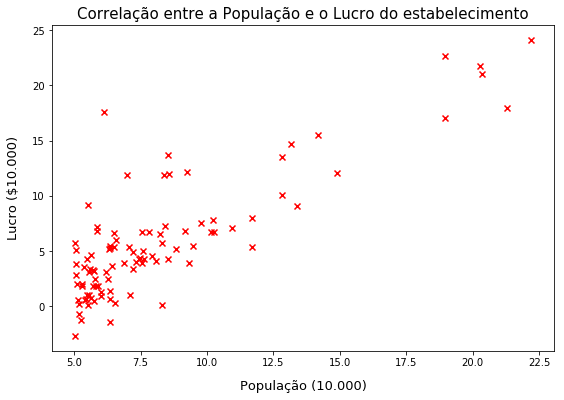

In [50]:
# Plotando gráfico
fig = plt.figure(figsize=(9, 6));
plt.scatter(df_1['population'], df_1['profit'], c='r', marker='x')
plt.title('Correlação entre a População e o Lucro do estabelecimento', size=15)
plt.xlabel('População (10.000)', size=13, labelpad=12)
plt.ylabel('Lucro ($10.000)', size=13, labelpad=12)
plt.show()

Como o conjunto de dados é muito pequeno, não vale a pena realizar a separação em dados de teste e dados de treinamento através da função ```train_test_split()``` do scikit-learn.

In [61]:
# Separando dados em features e labels
X = df_1['population']
X = X.values.reshape(-1, 1)

y = df_1['profit']

    O reshape foi necessário pois tratam-se de dados com apenas 1 feature.

In [62]:
# Importando biblioteca para treinamento
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# Coeficientes
print(f'Intersecção no eixo y (theta_0): {lin_reg.intercept_}')
print(f'Coeficiente theta_1: {lin_reg.coef_[0]}')

Intersecção no eixo y (theta_0): -3.89578087831185
Coeficiente theta_1: 1.1930336441895935


In [136]:
# Construindo um dataframe com todos o's coeficiente
coef_0 = pd.DataFrame(list(zip(['theta0'], np.array([lin_reg.intercept_]))), columns=['features', 'estimatedCoef'])
coefs = pd.DataFrame(list(zip(['population'], lin_reg.coef_)), columns=['features', 'estimatedCoef'])

coefs = coef_0.append(coefs).reset_index().drop(['index'], axis=1)
coefs

,features,estimatedCoef
0,theta0,-3.895781
1,population,1.193034


In [63]:
help(lin_reg.predict)

Help on method predict in module sklearn.linear_model.base:

predict(X) method of sklearn.linear_model.base.LinearRegression instance
    Predict using the linear model
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape = (n_samples,)
        Returns predicted values.



In [139]:
X.shape

(97, 1)

In [153]:
# Predizendo valores
predictions = lin_reg.predict([[3.5],[7]])
predictions*10000

array([ 2798.36876352, 44554.54631015])

In [155]:
# Comunicando resultados
print(f'Para uma população de 35.000 habitantes, foi previsto um lucro de ${predictions[0]*10000:.2f}')
print(f'Para uma população de 70.000 habitantes, foi previsto um lucro de ${predictions[1]*10000:.2f}')

Para uma população de 35.000 habitantes, foi previsto um lucro de $2798.37
Para uma população de 70.000 habitantes, foi previsto um lucro de $44554.55


In [161]:
# Calculando erro
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
var = r2_score(y, y_pred)
print(f'Erro Quadrático Médio: {mse:.2f}')
print(f'Variance Score (1 é perfeito): {var:.2f}')

Erro Quadrático Médio: 8.95
Variance Score (1 é perfeito): 0.70


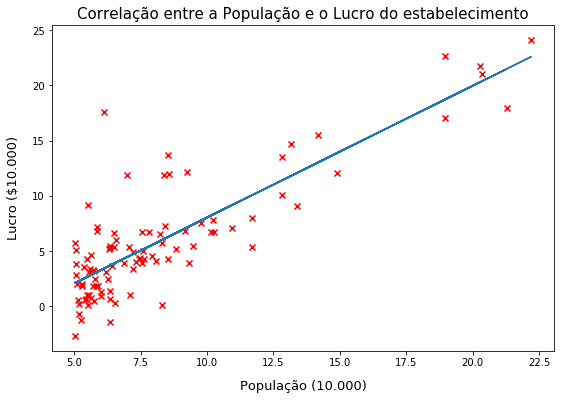

In [159]:
# Plotando gráfico
fig = plt.figure(figsize=(9, 6));
plt.scatter(df_1['population'], df_1['profit'], c='r', marker='x')
plt.plot(X, y_pred)
plt.title('Correlação entre a População e o Lucro do estabelecimento', size=15)
plt.xlabel('População (10.000)', size=13, labelpad=12)
plt.ylabel('Lucro ($10.000)', size=13, labelpad=12)
plt.show()